# Before and After

<a href="../../_slides/chapter-5-slides.html">See also the slides that summarize a portion of this content.</a>

The phrase "before and after" has two meanings for us in MA346.
 * First, it relates to code:  What *requirements* do we need to satisfy *before* doing something with data, and what *guarantees* do the math and stats techniques we use provide *after* we've used them?
 * Second, it relates to communicating about code:  When we're writing explanations about our code, how do we know what kind of explanations to insert *before and after* a piece of code?

Let's look at each of these meanings separately.

## Requirements and Guarantees

### Requirements

Almost nobody ever writes a piece of code with no clear purpose in mind.  You can't write code the way you can doodle in the margins of a notebook, aimless, purposeless, spacing out.  Code almost always accomplishes something; that's what it was built for and that's why we use it.  So when we're coding, it's helpful to think about our code in a purposeful way.  It helps to do so in a "before and after" way.

Before writing a piece of code, you need to know what situation you're currently in (including your data, variables, files, etc.).  This is because the code you write will almost certainly have requirements that need to be true before that code can be run.  Here are some examples:
 * If I'm going to sort a health care DataFrame by the "heart rate" column, the DataFrame had better have a "heart rate" column, not a "heart_rate" column, or a "HeartRate" column, etc.  (This is a requirement imposed by the sorting routine.  It can't guess the column name's correct spelling; you have to provide it.)
 * If I'm going to fit a linear model to the relationship between the "heart rate" variable and the "oxygen replacement" variable, I should be sure that the relationship between those two variables appears to be approximately linear.  (This is a requirement imposed by the nature of linear models.  It isn't always a smart idea to use a linear model if that doesn't reflect the actual relationship in the data.)

Any code I'm about to run has *requirements* that must be true in order for that code to work, and if those requirements aren't satisfied, the code will either give you an error or silently do the wrong thing.  Sometimes these are called "assumptions" instead of requirements, because the code assumes you're running it in a situation where it makes sense to do so.

For instance, in the "heart rate" example above, we would get an error, because the column we tried to sort by didn't exist.  But in the linear model example above, we would get no error, just a linear model that probably wasn't very useful, or might produce poor predictions.

You can think of these requirements as **what to know before running your code** (or what to check if you don't yet know it).  They are almost always phrased in terms of the inputs to the function you're about to run, such as the data type the input must have, or the size/shape it must have, or the contents it must have.

How do we avoid messing this up?  *Know what the relevant requirements are* for the code you're about to run and *check them before you run the code.*  In some cases, the requirements are so small that it doesn't make sense to waste time checking them, as in the "heart rate" example above.  (If we get it wrong, the error message will tell us, and we'll fix it, nice and easy.)  But in other cases, the requirements are important and take time to check, as in the linear model example above.  In fact, let's see how that would work:

Let's say we've loaded a dataset of mortgages, with columns for `property_value` and `total_loan_costs`.

In [1]:
import pandas as pd
df = pd.read_csv( '_static/practice-project-dataset-1.csv' )

I'm suspecting `total_loan_costs` can be estimated pretty reliably with a linear model from `property_value`.  But before I go and fit such a model, I had better check to be sure that the relationship between those variables actually seems to be linear.  The code below does so.

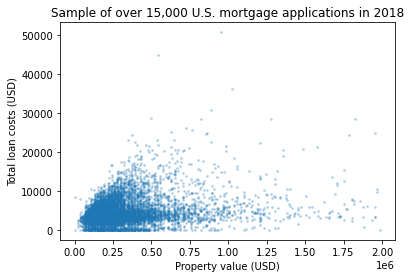

In [2]:
import numpy as np
import matplotlib.pyplot as plt
two_cols = df[['property_value','total_loan_costs']].replace( 'Exempt', np.nan )
two_cols = two_cols.dropna().astype( float )
two_cols = two_cols[two_cols['property_value'] < 2000000]
plt.scatter( two_cols['property_value'], two_cols['total_loan_costs'], s=3, alpha=0.25 )
plt.title( 'Sample of over 15,000 U.S. mortgage applications in 2018' )
plt.xlabel( 'Property value (USD)' )
plt.ylabel( 'Total loan costs (USD)' )
plt.show()

Hmm...While some portions of that picture are linear (such as the top and bottom edges, as well as a thick strip at about $y=4000$), it's pretty clear that the whole shape is not at all close to a straight line.  Any model that predicts total costs just based on property value is going to be an unreliable predictor.  I almost certainly don't want to make a linear model for this after all (unless I'm in a situation in which I just need an *extremely* rough estimate).  Good thing I checked the requirements before making the model!

### Guarantees

Each piece of code you run also provides certain guarantees that it will do for you (as long as you took care to ensure that the assumptions it required held true).  Here are some examples:
 * If you have a pandas DataFrame `df` containing numeric data and you call `df.mean()`, you will get a list of the mean value of each column in the data, computed separately, using the standard definition of mean from your intro stats class.
 * If you fit a linear model to data using the standard method (ordinary least squares), then you know that the resulting model is the one that minimizes the sum of the squared residuals.  In other words, the expected estimation error on your data is as small as possible.

These guarantees are, in fact, the reason we run the code in the first place.  We have goals for our data work, and someone has provided us some Python-based tools that help us achieve our goals.  We trust the guarantees their software provides, and so we use it.

It's important to be familiar with the guarantees provided by your math and stats software, for two reasons.  First, obviously, you can't choose which code to run unless you know what it's going to do when you run it!  But secondly, you're going to want to be able to write good explanations to go along with your code, and you can't do that unless you can articulate the guarantees your code makes.  Let's talk about good explanations next.

## Communication

```{admonition} Big Picture - Explanations before and after code
---
class: alert alert-primary
---
The best code notebooks explain their contents according to two rules:
 1. Before each piece of code, explain the motivation for the code.
 2. After each piece of code, explain what the output means.

**Connect the two!** Your output explanation should directly address your motivation for running the code.
```

This is so important that we should see some examples.

### Example 1

Imagine that you just came across the following code, all by itself.

In [3]:
df['state_code'].value_counts().head( 10 )

CA    1684
FL    1136
TX    1119
PA     564
GA     558
OH     542
NY     535
NC     524
IL     508
MI     469
Name: state_code, dtype: int64

Seeing this code naturally causes us to ask questions like:  Why are we running this code?  What is this output saying?  Who cares?  What are the numbers next to the state codes?  Why just these 10 states?

If instead the writer of the code had followed the two rules in the "Big Picture" lesson from earlier in the chapter, none of those questions would arise.  Here's how they could have done it:

---

Which states have the most mortgage applications in our dataset?

In [4]:
df['state_code'].value_counts().head( 10 )

CA    1684
FL    1136
TX    1119
PA     564
GA     558
OH     542
NY     535
NC     524
IL     508
MI     469
Name: state_code, dtype: int64

Each state is shown next to the number of applications from that state in our dataset, largest first, then descending.  Here we show just the top 10.

---

Even with just a small piece of code, notice how easy it is to understand when we have the two explanations.  The sentence before the code asks an easy-to-understand question that shows the writer's motivation for the code.  The two sentences after the code explain what the output shows and why we can trust it.

We help the reader out (and ourselves later when we come back to this code!) by following those two simple rules of explanation.

### Example 2

Imagine encountering this code:

In [5]:
rates = df['interest_rate']
rates.describe()

count     10061
unique      500
top        4.75
freq        912
Name: interest_rate, dtype: object

Although in this case, you might know what's going on because `.describe()` is so common in pandas, it still doesn't tell us why the code was run, or what we're supposed to pay attention to in the output.

Imagine instead that the writer of the code had done this:

---

We'd like to use the interest rates in the dataset to do some computation.  What format are they currently stored in?

In [6]:
rates = df['interest_rate']
rates.describe()

count     10061
unique      500
top        4.75
freq        912
Name: interest_rate, dtype: object

The interest rates are written as percentages, since we see the most common one was 4.75 (instead of 0.0475, for example).  However, they are currently stored as text (what pandas calls "dtype: object"), so we must convert them before using them.  We stored them in the `rates` variable so we can manipulate it further later.

---

Now we know why the original coder cared about this output (and perhaps why we should).  Also, if we didn't know what "dtype: object" meant, or why we might pay attention to that, now we know.  Also, we know not to multiply anything by these interest rates without also dividing by 100, because they're percentages.  Much more helpful than just the code alone!

Poor or missing explanations decrease productivity.  When you work on a project that takes more than one day to do (and you will definitely have that experience in MA346), you're guaranteed to come back and look at some code that you wrote in the past and scratch your head, wondering why it doesn't look familiar.  This happens to everyone.  Help yourself out by adding explanations about each piece of code you write.  This is a requirement for the projects you do in this class; you'll se more about this when you read the specific grading requirements for each project.

If one day you find yourself coding in a professional environment, you'll definitely want to document your work with comments and explanations.  You're sure to share your work with teammates at some point.  You may even use your work to show new people who join the team how to get started.  A pile of code without explanations is far less useful than code interspersed with careful explanations.

### Knowing your target audience

When you're considering adding explanations to your code, imagine yourself explaining the code to a future reader.
 * If you suspect it's a teammate that will read your code, write what you would say to them if you had to explain the code in person.
 * If you know it's your MA346 instructor who will read your code, write in such a way that you prove you know what your code does and can articulate why you wrote it.
 * If you know it's a new coder who will read your code, be more thorough and don't take any knowledge for granted.  Think about what might confuse them and address it.

### Professionalism

In a business context, taking the time required to make your writing as brief as possible has many benefits.  It enhances productivity because your writing is faster to read.  It reduces confusion because long writing makes people space out.  It shows respect because you've invested the time required to make sure your writing doesn't waste your reader's time.  Short, simple writing doesn't make you look unintelligent; it makes you look like a clear writer.

It is also essential to proofread what you've written.  Code explanations that don't make sense because of typos, missing words, spelling errors, or enormous paragraphs are helpful to almost no one.  Take the time to ensure your writing would make your EXP101 professor proud.  In particular, any sufficiently long text (over one page, or one computer screen) needs headings to help the reader see the big picture.

```{admonition} Learning on Your Own - Technical Writing Tips
---
class: alert alert-danger
---
Interview a professor in the English and Media Studies department.  Ask what their top 5 tips are for technical and/or business writing.  Create a report, video, or presentation on this for your MA346 peers.  Is it possible, for each tip, to show a realistic example of how bad things can be when someone disobeys the tip, compared side-by-side with a realistic example of how good things can be when the tip is followed?
```

### Choosing a medium

Should I put my code explanations as comments in the code, or as Markdown cells, or what?  Here are some brief guidelines, but there are no set rules.
 * A Python script with comments in it is best if:
    * you're writing a Python module that other software developers will read (which we won't do in this class), or
    * the code is short enough that it doesn't warrant a full Jupyter notebook.
 * A Jupyter notebook with Markdown cells is best if:
    * the code will generate tables and graphs that are a key part of what you're trying to communicate, and
    * the readers are other coders, who may want to see the code along with the tables and graphs,
    * but it's okay to also insert comments within code cells *in addition to* the before-and-after explanations between cells.
 * A report (such as a Word doc) or slide deck is best if:
    * your audience is nontechnical and therefore will be disconcerted to see your code, or
    * your audience is technical but in this particular instance they just want your results, or
    * the amount of writing and pictures in what you need to share is high, and the amount of code very small.
    * Showing code in slides is rarely welcome in a business context.
 * A code repository (which we'll learn about in future weeks) is best if:
    * you have several files you want to share together, such as one or more notebooks and one or more data files, and
    * you know that your audience may want to have access not just to your results, but to your code and data as well, and
    * you know that your audience is comfortable accessing a code repository.